In [47]:
import torch
import torch.nn as nn

class MLPClassifier(nn.Module):
    def __init__(self, input_dim=4, hidden_dim=8, output_dim=3):
        super(MLPClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.model(x)


Training MLP...

Epoch 10/100 | Loss: 0.3060 | Accuracy: 0.8833
Epoch 20/100 | Loss: 0.1235 | Accuracy: 0.9583
Epoch 30/100 | Loss: 0.0766 | Accuracy: 0.9667
Epoch 40/100 | Loss: 0.0602 | Accuracy: 0.9750
Epoch 50/100 | Loss: 0.0534 | Accuracy: 0.9750
Epoch 60/100 | Loss: 0.0523 | Accuracy: 0.9833
Epoch 70/100 | Loss: 0.0473 | Accuracy: 0.9833
Epoch 80/100 | Loss: 0.0450 | Accuracy: 0.9833
Epoch 90/100 | Loss: 0.0451 | Accuracy: 0.9833
Epoch 100/100 | Loss: 0.0428 | Accuracy: 0.9833


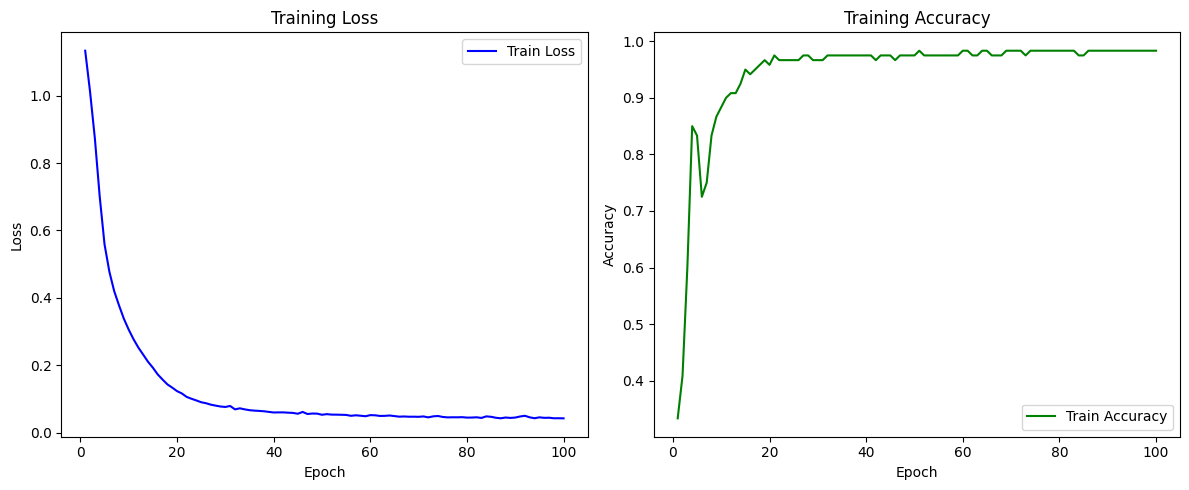


Model saved as model.pth


In [48]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
from model import MLPClassifier

# Load dataset
data = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

X = data.iloc[:, :-1].values
y = pd.Categorical(data.iloc[:, -1]).codes

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

X_train_t = torch.FloatTensor(X_train)
y_train_t = torch.LongTensor(y_train)
train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

model = MLPClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 100
train_losses = []
train_accuracies = []

print("Training MLP...\n")
for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = correct / total

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs} | Loss: {epoch_loss:.4f} | Accuracy: {epoch_acc:.4f}")

# Visualisasi
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Simpan model
torch.save(model.state_dict(), 'model.pth')
print("\nModel saved as model.pth")


In [49]:
import torch
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from model import MLPClassifier

# Load data
data = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

X = data.iloc[:, :-1].values
y = pd.Categorical(data.iloc[:, -1]).codes

label_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Load model
model = MLPClassifier()
model.load_state_dict(torch.load('model.pth'))
model.eval()

def predict(model, X):
    with torch.no_grad():
        X_tensor = torch.FloatTensor(X)
        outputs = model(X_tensor)
        _, preds = torch.max(outputs, 1)
        return preds.numpy()

# Prediksi contoh
sample_data = [
    [5.1, 3.5, 1.4, 0.2],
    [6.7, 3.0, 5.2, 2.3]
]
sample_scaled = scaler.transform(sample_data)
predictions = predict(model, sample_scaled)

print("\nPrediksi data baru:")
for i, pred in enumerate(predictions):
    print(f"Sample {i+1}: Predicted class = {pred} ({label_map[pred]})")

# Evaluasi akurasi MLP
X_test_t = torch.FloatTensor(X_test)
y_test_t = torch.LongTensor(y_test)

with torch.no_grad():
    outputs = model(X_test_t)
    _, y_pred = torch.max(outputs, 1)
acc = (y_pred == y_test_t).sum().item() / len(y_test_t)
print(f"\nMLP Test Accuracy: {acc:.4f}")



Prediksi data baru:
Sample 1: Predicted class = 0 (Iris-setosa)
Sample 2: Predicted class = 2 (Iris-virginica)

MLP Test Accuracy: 0.9667



Logistic Regression Test Accuracy: 0.9333


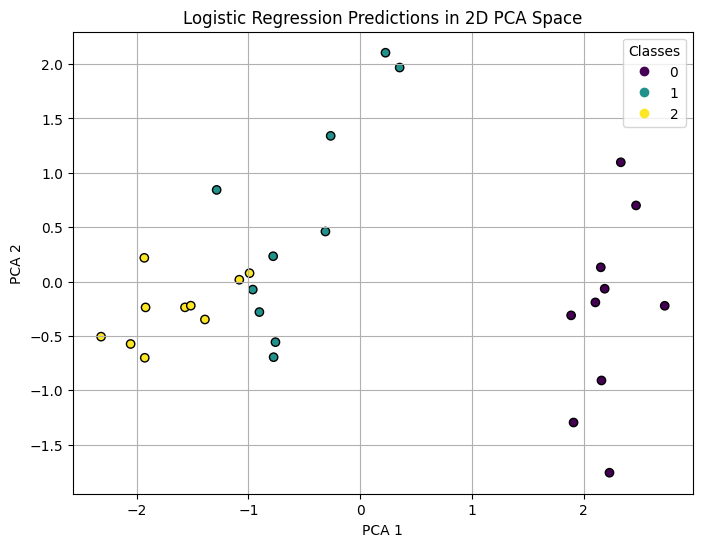

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

X = data.iloc[:, :-1].values
y = pd.Categorical(data.iloc[:, -1]).codes

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nLogistic Regression Test Accuracy: {acc:.4f}")

# PCA Visualisasi
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_pred, cmap='viridis', edgecolor='k')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title('Logistic Regression Predictions in 2D PCA Space')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()
